In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [12]:
data_path = r"C:\Jave\Seasonality\dataset\001410060001_001410040000000013.csv"

In [13]:
data = pd.read_csv(data_path)
data.head()

,date,month,days,week_day,is_holiday_ever,quantity
0,2017-11-25,11,25,5,0,0.0
1,2017-11-26,11,26,6,0,0.0
2,2017-11-27,11,27,0,0,2.0
3,2017-11-28,11,28,1,0,0.0
4,2017-11-29,11,29,2,0,10.0


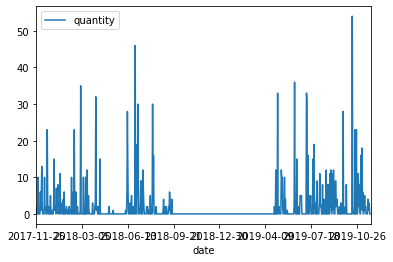

In [14]:
data.plot(x = 'date', y = 'quantity')

In [15]:
new_date = data.date.astype('datetime64')
data.drop('date', axis=1)
data['date'] = new_date

0     2017-11-25
1     2017-11-26
2     2017-11-27
3     2017-11-28
4     2017-11-29
         ...    
727   2019-11-22
728   2019-11-23
729   2019-11-24
730   2019-11-25
731   2019-11-26
Name: date, Length: 732, dtype: datetime64[ns]

In [17]:
lines = int(data.shape[0] / 2)
first_year = data[:lines]
second_year = data[data.shape[0]-lines:]

(366, 6)

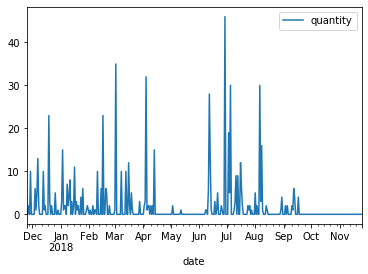

In [18]:
first_year.plot(x = 'date', y = 'quantity')
first_year.shape

(366, 6)

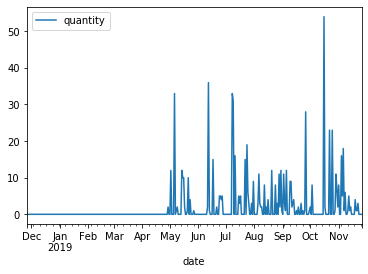

In [19]:
second_year.plot(x = 'date', y = 'quantity')
second_year.shape

In [20]:
data = data[data.quantity > 0]
qtde_median = data['quantity'].median()

In [21]:
first_year = first_year[first_year.quantity > qtde_median]
second_year = second_year[second_year.quantity > qtde_median]

(45, 6)

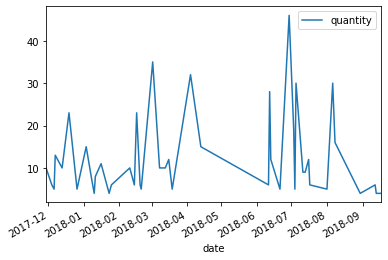

In [22]:
first_year.plot(x = 'date', y = 'quantity')
first_year.shape

(48, 6)

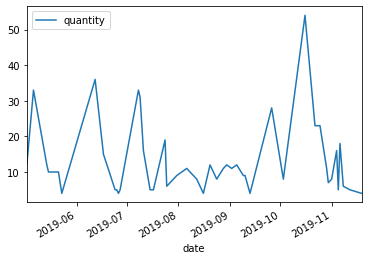

In [23]:
second_year.plot(x = 'date', y = 'quantity')
second_year.shape

In [78]:
datelist = pd.date_range(end=datetime.date.today(), periods=52, freq='W').tolist()

In [106]:
def analysis_moviment_year(begin_week, end_week):            
    data_first = first_year[first_year.date >= begin_week - datetime.timedelta(days=365)]
    data_first = data_first[data_first.date < end_week - datetime.timedelta(days=365)]
    
    data_second = second_year[second_year.date >= begin_week]
    data_second = data_second[data_second.date < end_week]
    
    quantity_first, quantity_second = data_first.quantity, data_second.quantity
    sum_first, sum_second = quantity_first.sum(), quantity_second.sum()

    validate = (max([sum_first, sum_second]) - min([sum_first, sum_second])) < int(max([sum_first, sum_second])*0.5)

    print(sum_first, sum_second)
    if validate:
        print('proximos: {}, {}'.format(sum_first, sum_second))

In [107]:
begin_week = datelist[0] - datetime.timedelta(days=7)
for end_week in datelist:
    analysis_moviment_year(begin_week, end_week)    
    begin_week = end_week

24.0 0.0
10.0 0.0
23.0 0.0
5.0 0.0
15.0 0.0
19.0 0.0
11.0 0.0
10.0 0.0
0.0 0.0
0.0 0.0
39.0 0.0
11.0 0.0
35.0 0.0
10.0 0.0
22.0 0.0
5.0 0.0
0.0 0.0
32.0 0.0
15.0 0.0
0.0 0.0
0.0 0.0
0.0 12.0
0.0 33.0
0.0 32.0
0.0 14.0
0.0 0.0
0.0 0.0
46.0 36.0
proximos: 46.0, 36.0
5.0 15.0
46.0 19.0
54.0 0.0
18.0 80.0
18.0 10.0
proximos: 18.0, 10.0
0.0 40.0
5.0 9.0
46.0 11.0
0.0 12.0
0.0 20.0
4.0 23.0
0.0 23.0
10.0 22.0
4.0 0.0
0.0 28.0
0.0 8.0
0.0 0.0
0.0 54.0
0.0 46.0
0.0 26.0
0.0 45.0
0.0 5.0
0.0 4.0
0.0 0.0
